# Ejemplo de Machine Learning. Uso de arboles de clasificación y redes neuronales en el dataset Irishdata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

from sklearn import preprocessing
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import graphviz 
from graphviz import Source
from sklearn.tree import export_graphviz

In [2]:
t0 = time.time()

In [3]:
iris0=pd.read_csv('iris_data.csv',sep=',',decimal='.')

In [4]:
iris0.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,2.8,6.7,2.0,Virginica
1,6.0,2.2,4.0,1.0,Versicolor
2,6.6,3.0,4.4,1.4,Versicolor
3,6.7,3.3,5.7,2.1,Virginica
4,4.9,3.1,1.5,0.1,Setosa
5,7.1,3.0,5.9,2.1,Virginica
6,6.8,3.2,5.9,2.3,Virginica
7,6.4,2.8,5.6,2.2,Virginica
8,5.1,3.4,1.5,0.2,Setosa
9,4.4,3.2,1.3,0.2,Setosa


In [5]:
#iris0 = datasets.load_iris()
#iris0

In [6]:
print(iris0['species'].value_counts())
iris1=iris0.copy()

Virginica     50
Versicolor    50
Setosa        50
Name: species, dtype: int64


In [7]:
le = preprocessing.LabelEncoder()
iris1['species']=le.fit_transform(iris1['species'])

# iris1['species'].replace(['Virginica','Versicolor','Setosa'], [0,1,2], inplace=True)
# iris1['species'].value_counts()

In [8]:
iris1.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,2.8,6.7,2.0,2
1,6.0,2.2,4.0,1.0,1
2,6.6,3.0,4.4,1.4,1
3,6.7,3.3,5.7,2.1,2
4,4.9,3.1,1.5,0.1,0
5,7.1,3.0,5.9,2.1,2
6,6.8,3.2,5.9,2.3,2
7,6.4,2.8,5.6,2.2,2
8,5.1,3.4,1.5,0.2,0
9,4.4,3.2,1.3,0.2,0


In [9]:
#%% CREA TRAIN y TEST
X=iris1.drop(['species'], axis=1)
y=iris1['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

2    40
1    40
0    40
Name: species, dtype: int64
2    10
1    10
0    10
Name: species, dtype: int64


In [10]:
#clf = DecisionTreeClassifier()
clf= DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=50, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0., 
                            max_features=None, random_state=None, max_leaf_nodes=None,min_impurity_decrease=0., min_impurity_split=None, 
                            class_weight=None, presort='deprecated', ccp_alpha=0.0)

In [11]:
#%% Creando el modelo
classifier= clf.fit(X_train, y_train)

In [12]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



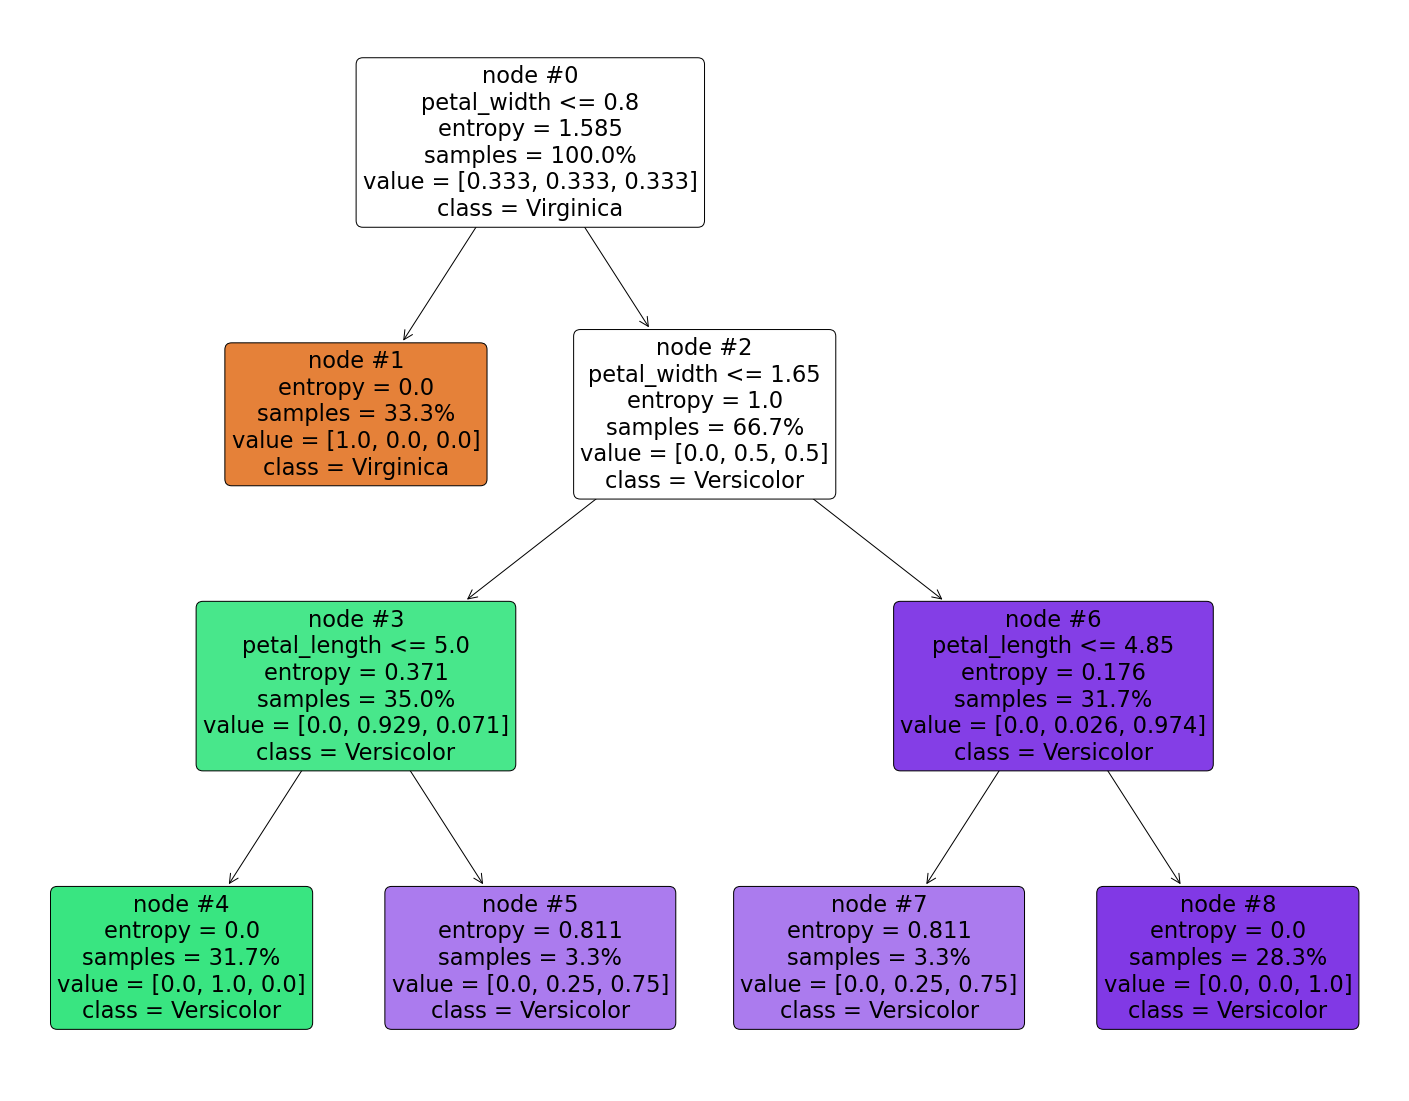

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,feature_names = X.columns, class_names=iris0['species'], label='all', filled = True, impurity=True, node_ids=True, proportion=True, rounded=True)

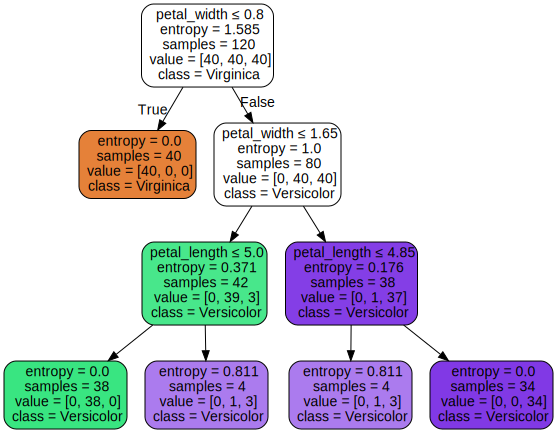

In [14]:
# Draw graph
dot_data = tree.export_graphviz(classifier, out_file=None,feature_names = X.columns, class_names=iris0['species'], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render("Irish") 
graph 

In [15]:
y_pred = classifier.predict(X_test)   

In [16]:
accuracyCLASE=accuracy_score(y_test, y_pred)*100
confusion_matrix_CLASES=confusion_matrix(y_test, y_pred)
p = classifier.predict_proba(X_test)

In [17]:
accuracyCLASE

93.33333333333333

In [18]:
p

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [19]:
print(confusion_matrix_CLASES)

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [20]:
print(classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division="warn"))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Ahora usemos una red neuronal!!!

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  

scaler.fit(X_train)  

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [23]:
clfNN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,), random_state=1)

clfNN.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [24]:
y_pred_NN=clfNN.predict(X_test)

In [25]:
y_pred_NN

array([1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1,
       2, 2, 0, 1, 2, 1, 0, 0])

In [26]:
accuracyCLASE_NN=accuracy_score(y_test, y_pred_NN)*100
confusion_matrix_CLASES_NN=confusion_matrix(y_test, y_pred_NN)

In [27]:
confusion_matrix_CLASES_NN

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

# Ahora una red neuronal profunda (Deep Learning)

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [53]:
model = Sequential([
   layers.Dense(100, activation='relu', input_shape=(4,)),
   layers.Dense(20, activation='relu'),
   layers.Dense(3, activation='softmax')
 ])

 # compile the keras model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [240]:
model = keras.Sequential()

#model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(100, input_dim=4, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# compile the keras model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
# fit the keras model on the dataset
#model.fit(X_train, y_train, epochs=10, batch_size=10)
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 830us/step - loss: 0.2897 - accuracy: 0.8750
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.8917
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.2687 - accuracy: 0.9083
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.9250
Epoch 5/50
4/4 [==============================] - 0s 990us/step - loss: 0.2506 - accuracy: 0.9250
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.9250
Epoch 7/50
4/4 [==============================] - 0s 919us/step - loss: 0.2326 - accuracy: 0.9250
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9250
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9250
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 0.2100 - accuracy: 0.9250
Epoch 11/50
4/4 [================

In [55]:
y_pred_DNN_probas = model.predict(X_test)

In [56]:
y_pred_DNN_probas

array([[1.72298495e-02, 8.95023644e-01, 8.77464563e-02],
       [1.71337381e-01, 5.43958724e-01, 2.84703910e-01],
       [9.41391528e-01, 3.33836861e-02, 2.52248924e-02],
       [7.55455764e-03, 7.52689302e-01, 2.39756167e-01],
       [4.43753181e-03, 3.00058603e-01, 6.95503891e-01],
       [1.62362337e-01, 6.09364569e-01, 2.28273049e-01],
       [9.62483287e-01, 2.11284570e-02, 1.63882077e-02],
       [9.61578071e-01, 2.01267134e-02, 1.82952005e-02],
       [9.87764180e-01, 3.36227682e-03, 8.87354650e-03],
       [1.25902584e-02, 9.46036100e-01, 4.13736477e-02],
       [7.85621703e-02, 7.16093302e-01, 2.05344498e-01],
       [9.64030087e-01, 1.63266324e-02, 1.96433105e-02],
       [5.97191136e-03, 1.12760574e-01, 8.81267488e-01],
       [3.38223018e-02, 2.90381610e-01, 6.75796092e-01],
       [1.16373934e-02, 1.12456165e-01, 8.75906467e-01],
       [9.68419909e-01, 1.55387111e-02, 1.60414074e-02],
       [2.51006875e-02, 2.75432855e-01, 6.99466467e-01],
       [9.43865478e-01, 2.60283

In [57]:
# Virginica= 2
# Versicolor= 1
# Setosa= 0

In [58]:
y_pred_DNN = np.argmax(y_pred_DNN_probas,axis=1)

In [59]:
y_pred_DNN

array([1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 0, 0])

In [60]:
accuracyCLASE_Depp_NN=accuracy_score(y_test, y_pred_DNN)*100
accuracyCLASE_Depp_NN

90.0

In [61]:
confusion_matrix_CLASES_Depp_NN=confusion_matrix(y_test, y_pred_DNN)

In [62]:
confusion_matrix_CLASES_Depp_NN

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  1,  9]])

In [40]:
t1 = time.time()
totalTime = t1-t0
totalTimeMin=totalTime/60

In [255]:
print('El tiempo total en segundos ha sido de', totalTime)

El tiempo total en segundos ha sido de 4.4761316776275635


In [256]:
print('El tiempo total en minutos ha sido de', totalTimeMin) 

El tiempo total en minutos ha sido de 0.07460219462712606


## También se pueden escribir ecuaciones usando el formato LaTex, por ejemplo, la formula general para encontrar las raices de una ecuación de segundo grado es $$x=\dfrac{-b\pm \sqrt{b^2-4ac}}{2a}$$

## Por otro lado, se puede escribir ecuaciones en línea, como ejemplo se muestra $MSE=(y-\hat{y})^2$. La funció $$f(x)=(x-2)^2=x^2-4x+4$$